In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'/Users/dana/Documents/Instacart Basket Analysis/'

In [3]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_active.pkl'))

In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_spent', 'spender_flag', 'order_frequency', 'order_freqency_flag',
       'age', 'number_of_dependents', 'family_status', 'income', 'state',
       'region', 'activity', 'customer_profile'],
      dtype='object')

In [5]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [6]:
df['price_range_loc'].value_counts()

Mid-range product     20891775
Low-range product      9674842
High-range product      397953
Name: price_range_loc, dtype: int64

In [7]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_spent', 'spender_flag', 'order_frequency', 'order_freqency_flag',
       'age', 'number_of_dependents', 'family_status', 'income', 'state',
       'region', 'activity', 'customer_profile', 'price_range_loc'],
      dtype='object')

In [8]:
df['price_range_loc'].value_counts()

Mid-range product     20891775
Low-range product      9674842
High-range product      397953
Name: price_range_loc, dtype: int64

<AxesSubplot:ylabel='count'>

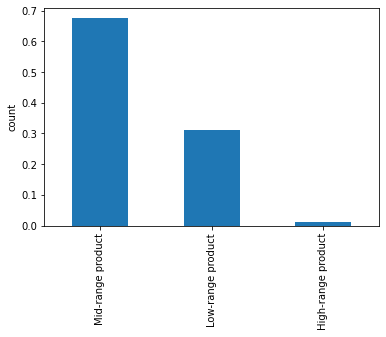

In [9]:
df['price_range_loc'].value_counts(round).plot(kind = 'bar', ylabel = 'count')

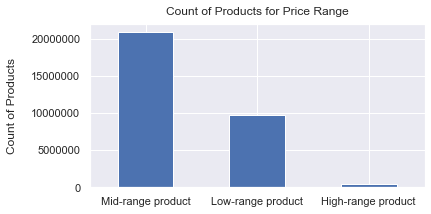

In [46]:
sns.set(font_scale=1)
plot1 = df['price_range_loc'].value_counts().plot(kind='bar', figsize=(6, 3), rot=0)
plt.ylabel("Count of Products", labelpad=14)
plt.title("Count of Products for Price Range", y = 1.02)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [47]:
plot1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_ranges.png'))

In [12]:
df = df.rename(columns = {'order_freqency_flag' : 'order_frequency_flag'})

In [13]:
pd.crosstab(df['loyalty_flag'], df['order_frequency_flag'], dropna = False)

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,32092,22181,22158
New customer,10997,7575,7593
Regular customer,40286,27730,28072


In [14]:
pd.crosstab(df['region'], df['spender_flag'], dropna = False)

spender_flag,High spender,Low spender
region,,
midwest,1224,45647
northeast,883,33875
south,1716,63744
west,1343,50252


In [15]:
pd.crosstab(df['age'], df['spender_flag'], dropna = False)

spender_flag,High spender,Low spender
age,,
18,89,3016
19,71,3048
20,86,3312
21,62,2809
22,92,3079
...,...,...
77,77,2824
78,92,3401
79,95,3026


In [16]:
# create a 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [17]:
# split the dataframe into big and small samples
big = df[dev]
small = df[~dev]

In [18]:
# compare sizes
len(df)

30993489

In [19]:
len(big) + len(small)

30993489

In [20]:
# create a dataframe with only the columns I need
df_2 = small[['age','number_of_dependents','avg_spent','order_frequency']]

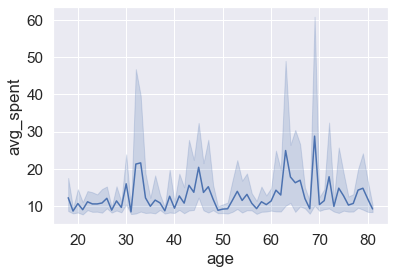

In [21]:
# create the line chart using the sampled dataset
line = sns.lineplot(data = df_2, x = 'age',y = 'avg_spent')

In [22]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_avg_spent.png'))

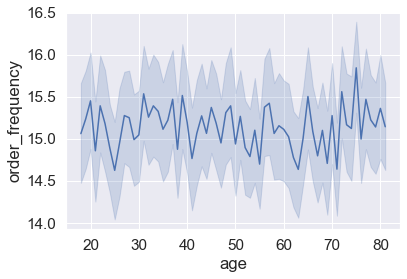

In [23]:
line2 = sns.lineplot(data = df_2, x = 'age',y = 'order_frequency')

In [24]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_order_freq.png'))

In [25]:
pd.crosstab(df['number_of_dependents'], df['spender_flag'], dropna = False)

spender_flag,High spender,Low spender
number_of_dependents,,
0,1229,47706
1,1332,48049
2,1248,48488
3,1357,49275


In [26]:
pd.crosstab(df['number_of_dependents'], df['order_frequency_flag'], dropna = False)

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
number_of_dependents,,,
0,20475,14103,14357
1,20688,14346,14347
2,21010,14406,14320
3,21202,14631,14799


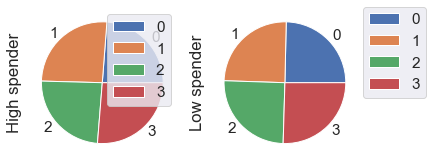

In [38]:
pie = df.groupby(['spender_flag', 'number_of_dependents'])['number_of_dependents'].count().unstack('spender_flag').fillna(0)
fig= pie.plot(kind='pie', subplots=True) 
fig=fig[0].get_figure()
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [28]:
# save as image file
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_spending_dependents.png'))

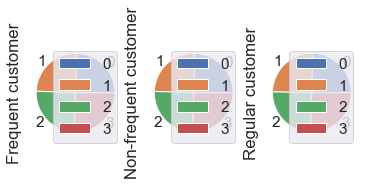

In [29]:
pie2 = df.groupby(['order_frequency_flag', 'number_of_dependents'])['number_of_dependents'].count().unstack('order_frequency_flag').fillna(0)
fig2= pie2.plot(kind='pie', subplots=True) 
fig2=fig2[0].get_figure()

In [30]:
# save as image file
fig2.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_orderfreq_dependents.png'))

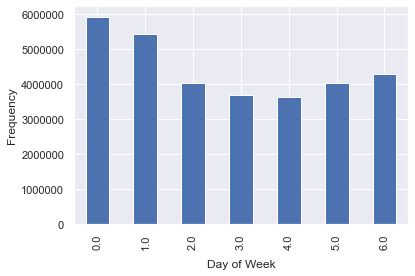

In [48]:
# make new day of week chart
df['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel('Day of Week', labelpad = 10)
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='y')

In [51]:
# replace numbers with days of week
new_df = df.replace({'orders_day_of_week':{0.0:'Sat', 1.0:'Sun', 2.0:'Mon', 3.0:'Tues', 4.0:'Wed', 5.0:'Thurs', 6.0:'Fri'}})

Text(0.5, 1.0, 'Orders by Day of Week')

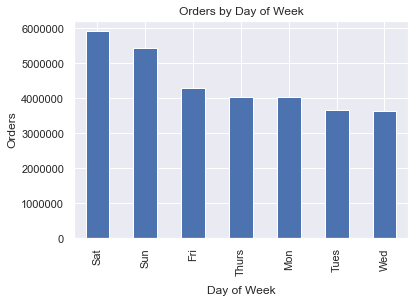

In [55]:
new_df['orders_day_of_week'].value_counts().plot.bar()
plt.xlabel('Day of Week', labelpad = 10)
plt.ylabel('Orders')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Orders by Day of Week')